---

title: **Video To Frame Script**

author: Tiago Ribeiro

date: 04/05/2023

---

### 📚 Libraries

In [ ]:
import os
import cv2
from glob import glob
import matplotlib.pyplot as plt
import numpy as np           

### 🗃️ Auxiliary Functions

In [ ]:
def vid_to_frame(vid_path, out_dir_frames, out_img_height, out_img_width, verbose = False):
    """
        Extracts frames from a video and saves them as PNG images.

        Args:
            vid_path (str): The path to the input video file.
            out_dir_frames (str): The path to the output directory where the frames will be saved as PNG images.
            out_img_height (int): The height of the output frames in pixels.
            out_img_width (int): The width of the output frames in pixels.
            verbose (bool, optional): Whether to print verbose output. Defaults to False.

        Returns:
            Tuple[int, int]: The original height and width of the input video, respectively.
    """        
    
    if not os.path.exists(out_dir_frames):
        os.makedirs(out_dir_frames)

    for filename in os.listdir(out_dir_frames):
        if filename.endswith(".png"):
            file_path = os.path.join(out_dir_frames, filename)
            os.remove(file_path)

    # create video capture object
    vid_cap = cv2.VideoCapture(vid_path)

    # original video dimensions
    orig_vid_width = int(vid_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    orig_vid_height = int(vid_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    if verbose == True:
        print(f"Video properties: {orig_vid_height}x{orig_vid_width} pixels,\
              {round(vid_cap.get(cv2.CAP_PROP_FPS), 2)} fps")
        print(f"Output frame dimensions: {out_img_height}x{out_img_width} pixels,\
            Number of frames: {int(vid_cap.get(cv2.CAP_PROP_FRAME_COUNT))}")

    if vid_cap.isOpened():
        frame_num = 0
        while (True):
            success, frame = vid_cap.read()
            if success == False:
                break
            frame_red = cv2.resize(frame, (out_img_width, out_img_height))
            # save as RGB (instead of BGR!)
            cv2.imwrite(out_dir_frames + "/frame_" + str(frame_num).zfill(6) + ".png", frame_red)
            frame_num += 1
    print('Conversion completed')
    return (orig_vid_height, orig_vid_width)

### 📁 Data source paths and directories creation

**note**: to test on your own machine, please set up the paths

In [ ]:
DATA_DIR = "E:\\BurnedAreaUAV_files\\Raw_data\\"
VIDEO_DIR = os.path.join(DATA_DIR, 'v1_2_DJI_0003.mp4')
OUT_DIR_FRAMES = os.path.join(DATA_DIR, 'frames_2')

In [ ]:
height, width = vid_to_frame(VIDEO_DIR, OUT_DIR_FRAMES, out_img_height=720, 
                             out_img_width=1280, verbose=True)

Video properties: 720x1280 pixels,               25.0 fps
Output frame dimensions: 720x1280 pixels,               Number of frames: 8182
Conversion completed


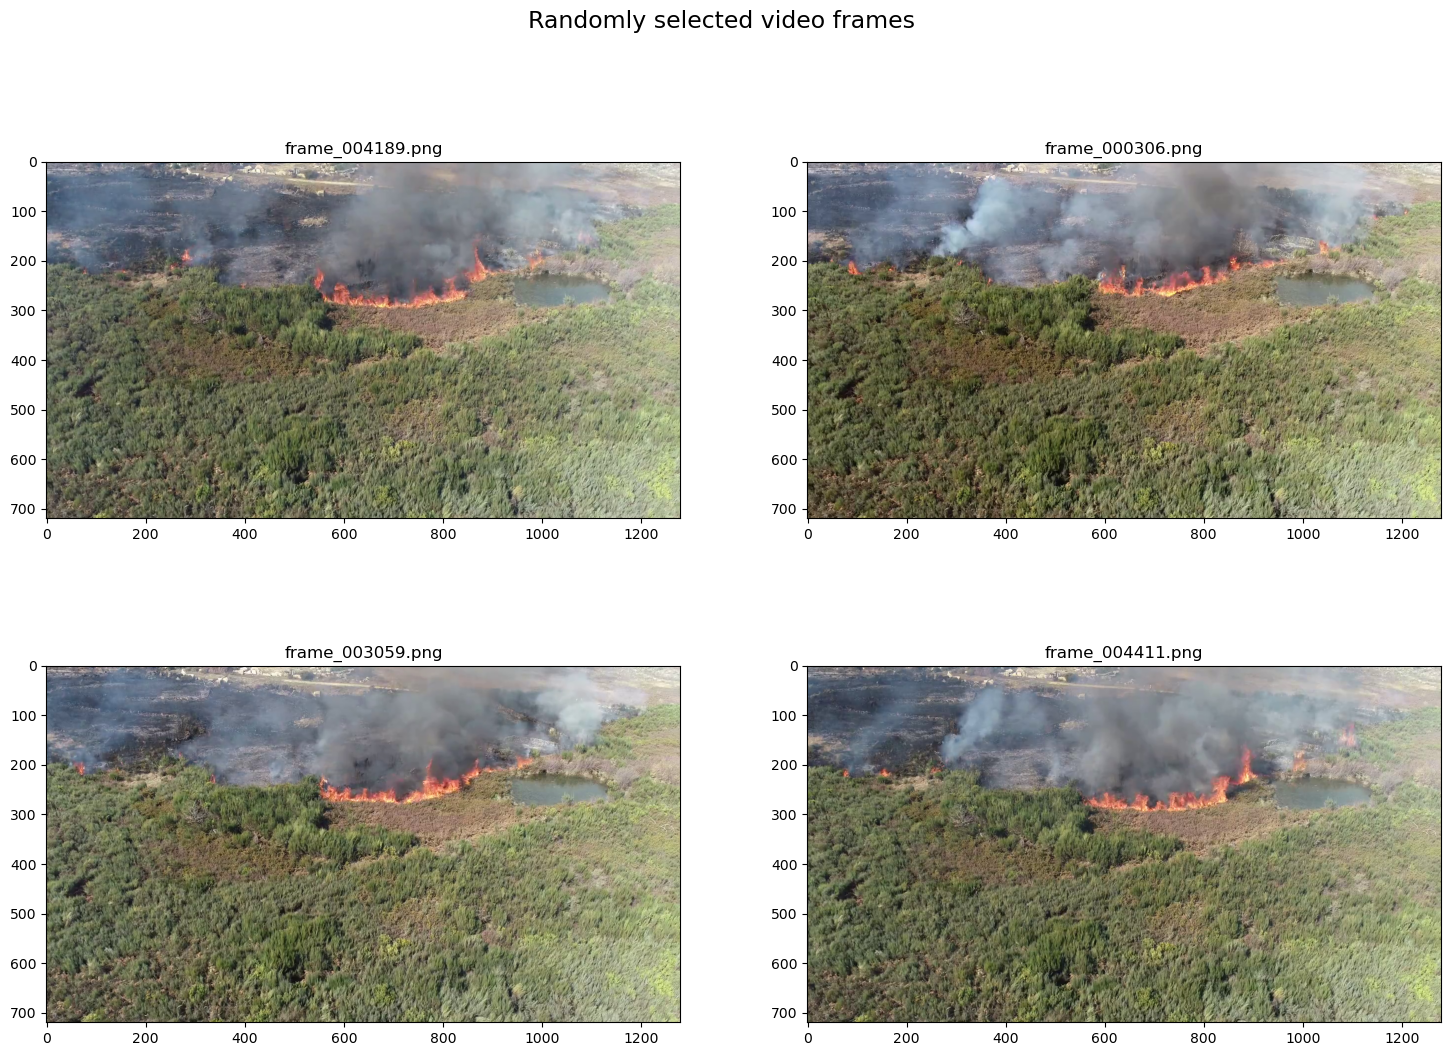

In [ ]:
### Exploring some of the video frames

frame_paths = sorted(glob(OUT_DIR_FRAMES + '\\*.png'))

fig, ax = plt.subplots(2, 2, figsize=(18, 12))
for i in range(2):
    for j in range(2):
        path = frame_paths[np.random.randint(0, len(frame_paths))]
        img = cv2.imread(path)[...,::-1]
        ax[i, j].set_title(os.path.basename(path))
        ax[i, j].imshow(img)
fig.suptitle('Randomly selected video frames', fontsize=17)
plt.show()